# read dataset

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

In [21]:
AI_Powered_Job_Market = pd.read_csv('ai_job_market_insights.csv')
AI_Powered_Job_Market.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [62]:
AI_Job_Threat_Index = pd.read_csv('My_Data.csv')
AI_Job_Threat_Index.head()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,98%,365,2546,0.143362,Communication & PR
1,Data Collector,95%,299,2148,0.139199,Data & IT
2,Data Entry,95%,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,95%,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,92%,194,1369,0.141709,Medical & Healthcare


# Data cleaning and exploration

### Dataset 1

### Dataset 2

In [63]:
print("\nSummary statistics:")
print(AI_Job_Threat_Index.describe())


Summary statistics:
             Tasks    AI models  AI_Workload_Ratio
count  4706.000000  4706.000000        4706.000000
mean    400.708032  1817.678071                inf
std     311.564781  1086.853037                NaN
min       1.000000     0.000000           0.036585
25%     161.000000  1085.250000           0.137271
50%     270.000000  1577.500000           0.199281
75%     608.750000  2273.000000           0.260572
max    1387.000000  5666.000000                inf


C:\Users\jessi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


##### Check for missing values

In [64]:
print("\nMissing values in each column:")
print(AI_Job_Threat_Index.isnull().sum())


Missing values in each column:
Job titiles          0
AI Impact            0
Tasks                0
AI models            0
AI_Workload_Ratio    0
Domain               0
dtype: int64


##### Change AI Impack to float instead of string

In [65]:
AI_Job_Threat_Index['AI Impact'] = AI_Job_Threat_Index['AI Impact'].str.rstrip('%').astype(float)/ 100

In [66]:
AI_Job_Threat_Index.head()

,Job titiles,AI Impact,Tasks,AI models,AI_Workload_Ratio,Domain
0,Communications Manager,0.98,365,2546,0.143362,Communication & PR
1,Data Collector,0.95,299,2148,0.139199,Data & IT
2,Data Entry,0.95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,0.95,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,0.92,194,1369,0.141709,Medical & Healthcare


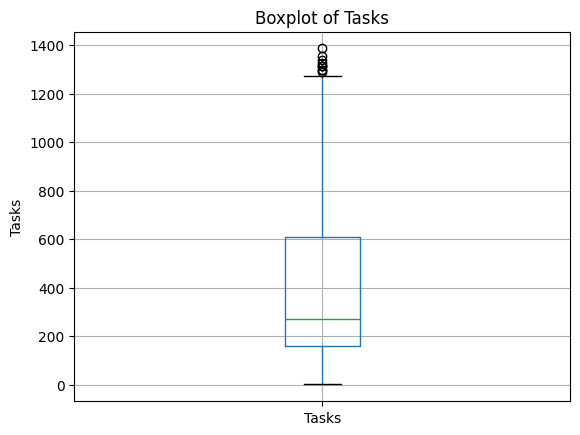

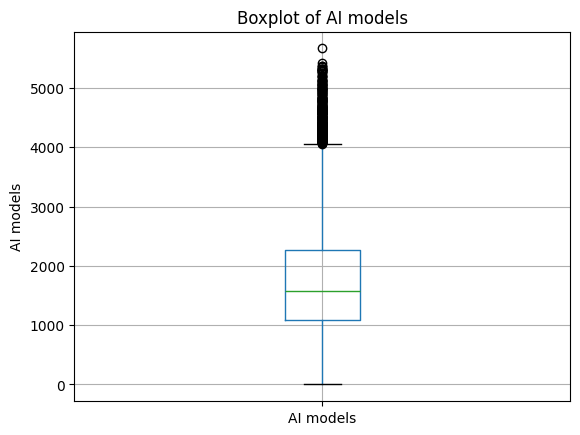

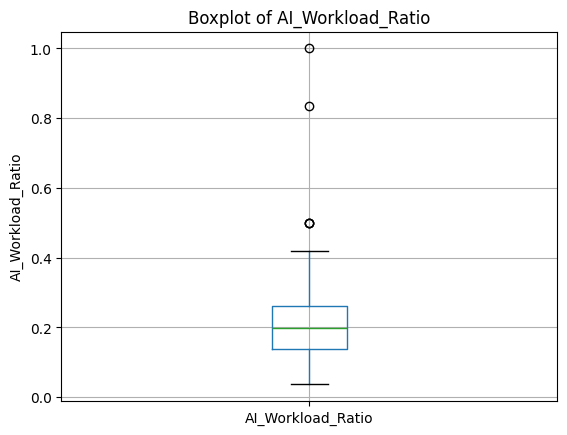

In [67]:
quant_features = ['Tasks', 'AI models', 'AI_Workload_Ratio']
for col in quant_features:
    plt.figure()
    AI_Job_Threat_Index.boxplot(column=col)
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

In [68]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data


In [80]:
filtered_df = AI_Job_Threat_Index.copy()
for col in quant_features:
    filtered_df = remove_outliers(filtered_df, col)

filtered_df.columns = filtered_df.columns.str.replace(' ', '_')
filtered_df.head()

,Job_titiles,AI_Impact,Tasks,AI_models,AI_Workload_Ratio,Domain
0,Communications Manager,0.98,365,2546,0.143362,Communication & PR
1,Data Collector,0.95,299,2148,0.139199,Data & IT
2,Data Entry,0.95,325,2278,0.142669,Administrative & Clerical
3,Mail Clerk,0.95,193,1366,0.141288,Leadership & Strategy
4,Compliance Officer,0.92,194,1369,0.141709,Medical & Healthcare


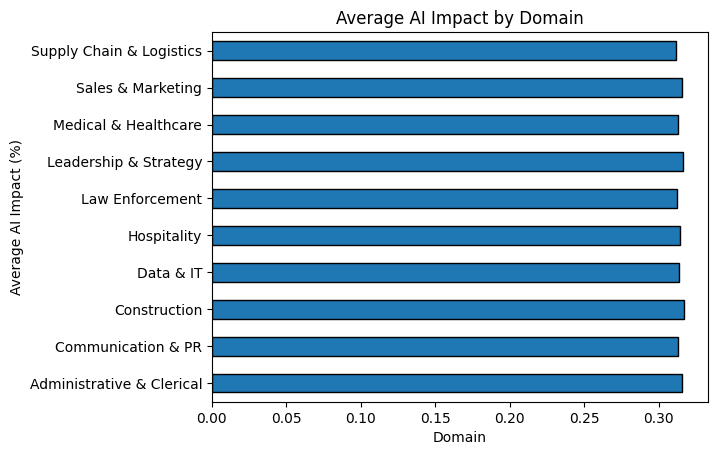

In [81]:
avg_impact_by_domain = filtered_df.groupby('Domain')['AI_Impact'].mean()

plt.figure()
avg_impact_by_domain.plot(kind='barh', edgecolor='black')
plt.title("Average AI Impact by Domain")
plt.xlabel("Domain")
plt.ylabel("Average AI Impact (%)")
plt.show()

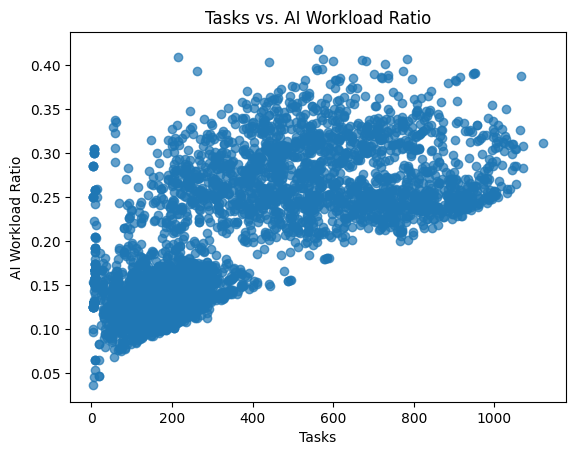

In [71]:
# Scatter plot: Tasks vs. AI Workload Ratio
plt.figure()
plt.scatter(filtered_df['Tasks'], filtered_df['AI_Workload_Ratio'], alpha=0.7)
plt.title("Tasks vs. AI Workload Ratio")
plt.xlabel("Tasks")
plt.ylabel("AI Workload Ratio")
plt.show()

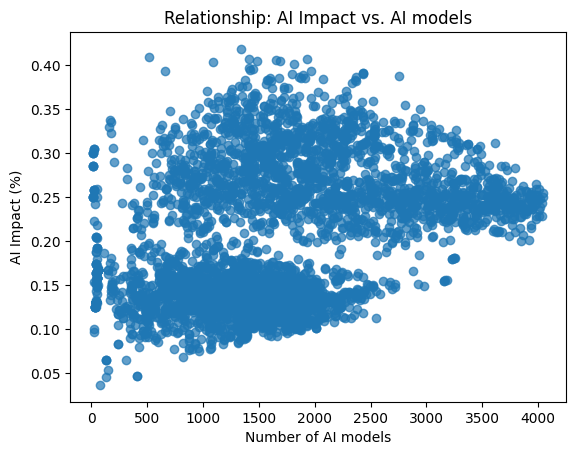

KeyError: 'AI models'

In [82]:
# Scatter plot for AI Impact vs. AI models
plt.figure()
plt.scatter(filtered_df['AI_models'], filtered_df['AI_Workload_Ratio'], alpha=0.7)
plt.title("Relationship: AI Impact vs. AI models")
plt.xlabel("Number of AI models")
plt.ylabel("AI Impact (%)")
plt.show()

# Calculate Pearson correlation coefficient
corr_coef_models, p_value_models = pearsonr(filtered_df['AI models'], filtered_df['AI_Workload_Ratio'])
print("Correlation between AI Impact and AI models:", corr_coef_models)

In [83]:
# Scatter plot for AI Impact vs. AI models
plt.figure()
plt.scatter(filtered_df['AI models'], filtered_df['AI_Impact'], alpha=0.7)
plt.title("Relationship: AI Impact vs. AI models")
plt.xlabel("Number of AI models")
plt.ylabel("AI Impact (%)")
plt.show()

# Calculate Pearson correlation coefficient
corr_coef_models, p_value_models = pearsonr(filtered_df['AI_models'], filtered_df['AI_Impact'])
print("Correlation between AI Impact and AI models:", corr_coef_models)

KeyError: 'AI models'

<Figure size 640x480 with 0 Axes>

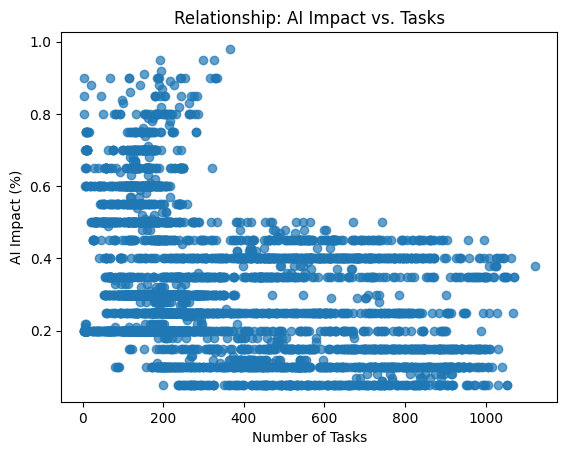

Correlation between AI Impact and Tasks: -0.3583205375514259


In [74]:
from scipy.stats import pearsonr
plt.figure()
plt.scatter(filtered_df['Tasks'], filtered_df['AI Impact'], alpha=0.7)
plt.title("Relationship: AI Impact vs. Tasks")
plt.xlabel("Number of Tasks")
plt.ylabel("AI Impact (%)")
plt.show()

# Calculate Pearson correlation coefficient
corr_coef, p_value = pearsonr(filtered_df['Tasks'], filtered_df['AI Impact'])
print("Correlation between AI Impact and Tasks:", corr_coef)

In [84]:
import itertools
col = filtered_df.columns.drop('AI_Impact')
formulas = []
for r in range(len(col) + 1):
    for combo in itertools.combinations(col, r):
        # For the empty subset, use a null model indicator (using 1 as a placeholder)
        if not combo:
            formula = "AI_Impact ~ 1"
        else:
            formula = "AI_Impact ~ " + " + ".join(combo)
        formulas.append(formula)
formulas[-10:]

['AI_Impact ~ Tasks + AI_models + AI_Workload_Ratio',
 'AI_Impact ~ Tasks + AI_models + Domain',
 'AI_Impact ~ Tasks + AI_Workload_Ratio + Domain',
 'AI_Impact ~ AI_models + AI_Workload_Ratio + Domain',
 'AI_Impact ~ Job_titiles + Tasks + AI_models + AI_Workload_Ratio',
 'AI_Impact ~ Job_titiles + Tasks + AI_models + Domain',
 'AI_Impact ~ Job_titiles + Tasks + AI_Workload_Ratio + Domain',
 'AI_Impact ~ Job_titiles + AI_models + AI_Workload_Ratio + Domain',
 'AI_Impact ~ Tasks + AI_models + AI_Workload_Ratio + Domain',
 'AI_Impact ~ Job_titiles + Tasks + AI_models + AI_Workload_Ratio + Domain']

In [ ]:
def criterion(formula, df):
    """
    Calculate the BIC for a given regression model formula and given dataframe.

    Parameters:
    formula (str): The regression model formula.
    df (pandas.DataFrame): The dataframe containing the data.

    Returns:
    float: The BIC value of the fitted model.
    """
    model = smf.ols(formula, df).fit()
    criterion_value = model.bic 
    return criterion_value

def remove(df, already_selected_columns, criterion, response='y'):

    # initialize the worst criterion and column to None
    worst_criterion = float('inf')
    worst_column = None

    # iterate over the already selected columns to find the worst column to remove
    for i in already_selected_columns:
        new_columns = already_selected_columns - {i}
        if new_columns:
            formula = f'{response} ~ {" + ".join(new_columns)}'
        else:
            formula = f'{response} ~ 1'
        # formula = f'{response} ~ {" + ".join(new_columns)}'
        current_criterion = criterion(formula, df)
        if current_criterion < worst_criterion:
            worst_criterion = current_criterion
            worst_column = i
    return worst_column, worst_criterion

def backward(df, criterion, response='y'):

    # initialize the set of already selected columns to all columns except the response variable
    already_selected_columns = set(df.columns.drop(response))
    best = criterion(f'{response} ~ {" + ".join(already_selected_columns)}', df)
    while len(already_selected_columns) > 0:

        # identify the worst column to remove based on the given criterion
        potential, current = remove(df, already_selected_columns, criterion, response)

        # check if the model with the worst column removed has a better criterion value
        if current <= best:
            already_selected_columns = already_selected_columns - {potential}
            best = current
            print(f'Criterion: {best}')
        else:
            break
    final_selection = already_selected_columns
    return final_selection

backward_vars = backward(filtered_df, criterion, "AI_Impact")
backward_vars